In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm 

In [2]:
startups = pd.read_csv("F:\\PYTHON\\ASSIGNMENTS\\Multilinear Regression\\Assignments\\50_Startups.csv")

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
startups.rename({'R&D Spend':'RandD_Spend'} , axis = 1, inplace = True)
startups.rename({'Marketing Spend': 'Marketing_Spend'}   , axis = 1 ,inplace = True)
# Renaming columns.

In [6]:
startups[startups['RandD_Spend']<500]

,RandD_Spend,Administration,Marketing_Spend,State,Profit
47,0.0,135426.92,0.00,California,42559.73
49,0.0,116983.80,45173.06,California,14681.40


In [7]:
startups["State"] = startups["State"].astype("category") # changing dtype of state to category.

In [8]:
startups["State"].unique()

['New York', 'California', 'Florida']
Categories (3, object): ['New York', 'California', 'Florida']

In [9]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RandD_Spend      50 non-null     float64 
 1   Administration   50 non-null     float64 
 2   Marketing_Spend  50 non-null     float64 
 3   State            50 non-null     category
 4   Profit           50 non-null     float64 
dtypes: category(1), float64(4)
memory usage: 1.7 KB


In [10]:
startups.corr()

,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


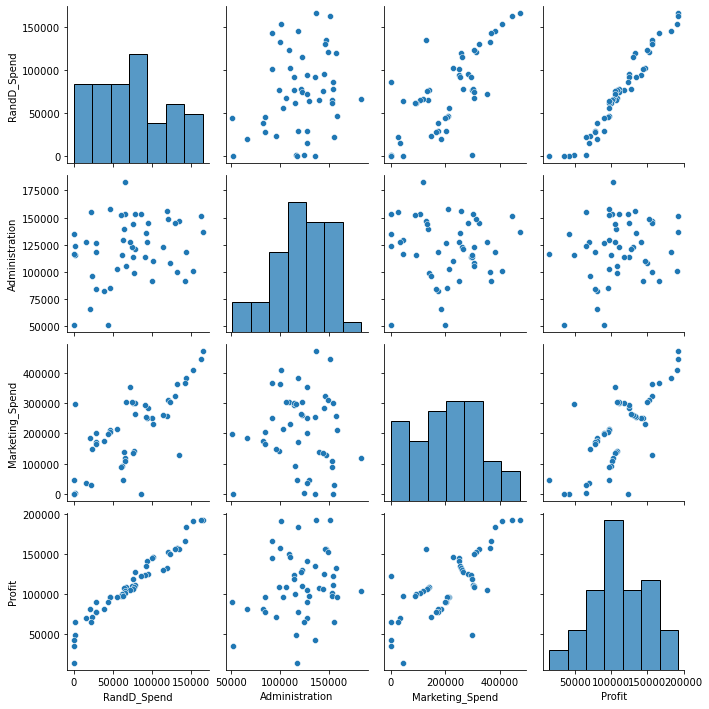

In [11]:
sns.pairplot(startups)
# Profit has strong linear relation with Marketing spend and R&D spend.
# but R and D , Marketing spend has high input input relation

In [12]:
# Preparing model for data
import statsmodels.formula.api as smf
model = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend" , data = startups).fit()
model1 = model.rsquared
model1_p = model.pvalues['Administration']
model1_pv = model.pvalues['Marketing_Spend']
model.summary()
# Since R value > .8 model is good , but P value of administration indicates chances of administration and Marketing spend variable going wrong.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        12:17:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Improving Model

In [14]:
# check for pattern of residuals

In [15]:
def standardizes_val(vals):
    return (vals - vals.mean())/vals.std()

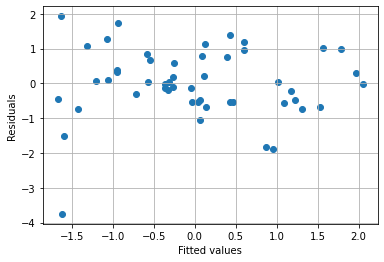

In [16]:
plt.scatter(standardizes_val(model.fittedvalues) , standardizes_val(model.resid))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.grid()
plt.show()
# No pattern observed , residuals are indipendent of each other.

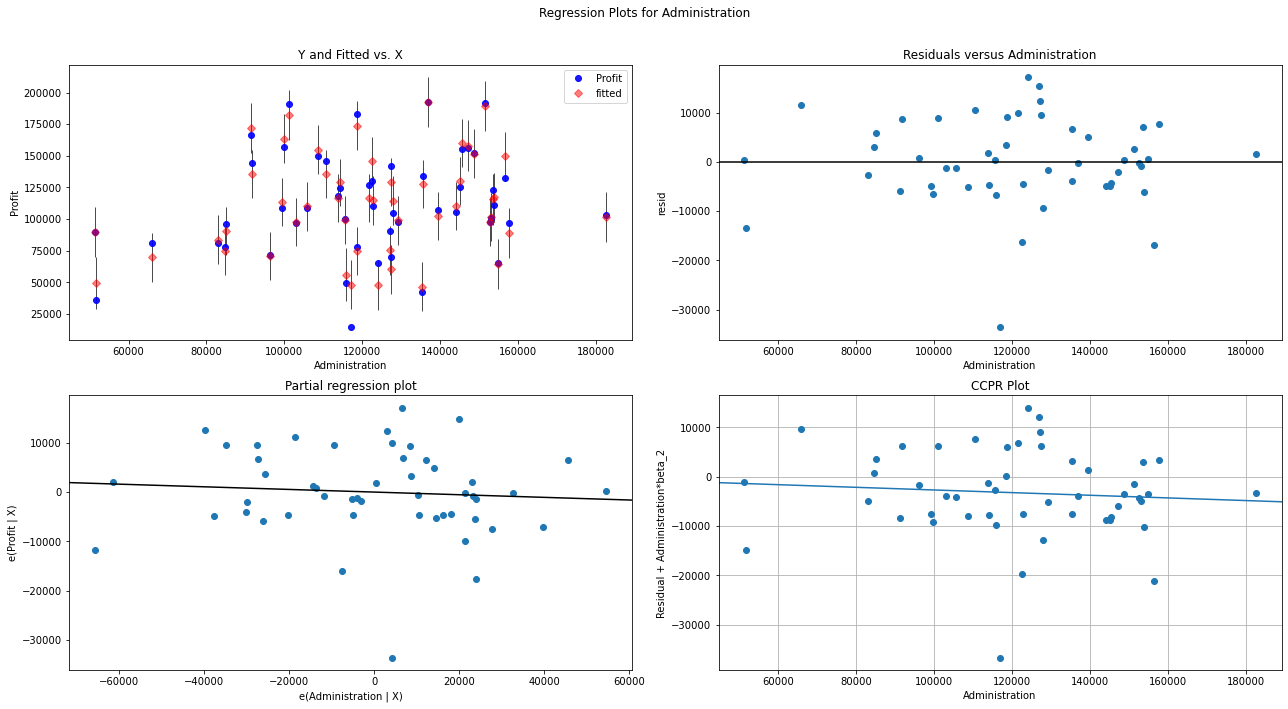

In [17]:
# To check effect of Adminstration variable with regards to output , plot Regressor vs residual plot
fig  = plt.figure(figsize=(18,10))
fig = sm.graphics.plot_regress_exog(model , 'Administration' , fig = fig)
plt.grid()
plt.show()
# From Partial regression plot , as line is nearer to x- axis , variable might not have good effect on model.

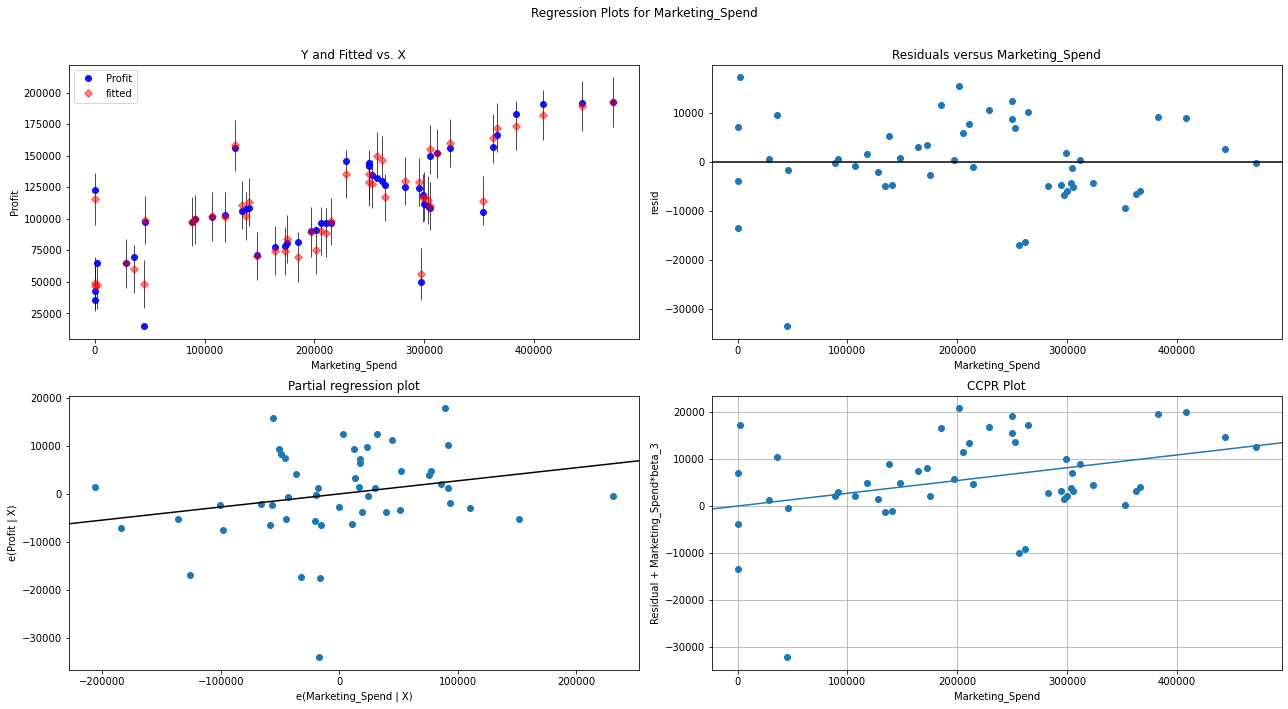

In [18]:
# To check effect of Marketing Spend variable with regards to output , plot Regressor vs residual plot
fig  = plt.figure(figsize=(18,10))
fig = sm.graphics.plot_regress_exog(model , 'Marketing_Spend' , fig = fig)
plt.grid()
plt.show()
# Comparing to administration , this has better effect on output.

In [19]:
# Checking for normal distribution of residuals.

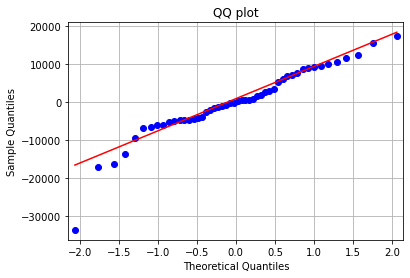

In [20]:

qqplot = sm.qqplot(model.resid , line = 'q')
plt.title("QQ plot")
plt.grid()
plt.show()

In [21]:
list(np.where(model.resid<-30000)) # point out of range of normal distribution

[array([49], dtype=int32)]

In [22]:
startups.iloc[49 , :]

RandD_Spend               0.0
Administration       116983.8
Marketing_Spend      45173.06
State              California
Profit                14681.4
Name: 49, dtype: object

In [23]:
# eleminating row 49.
startups_new = startups.drop(startups.index[49] , axis = 0).reset_index()


In [24]:
startups_new.drop('index' , axis = 1 , inplace = True) 

In [25]:
# creating new model 
model_new = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend" , data = startups_new).fit()
model2 = model_new.rsquared
model2_p = model_new.pvalues['Administration']
model2_pv = model_new.pvalues['Marketing_Spend']
model_new.summary()
# P value Marketing spend has been improved in this model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           8.85e-32
Time:                        12:17:36   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RandD_Spend         0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Using trasformation techniques 
model_new_sqrt = smf.ols("Profit~np.sqrt(RandD_Spend)+np.sqrt(Administration)+np.sqrt(Marketing_Spend)" , data = startups_new).fit()
model4 = model_new_sqrt.rsquared
model4_p = model_new_sqrt.pvalues['np.sqrt(Administration)']
model4_pv = model_new_sqrt.pvalues['np.sqrt(Marketing_Spend)']
model_new_sqrt.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     129.3
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           3.90e-22
Time:                        12:17:37   Log-Likelihood:                -530.50
No. Observations:                  49   AIC:                             1069.
Df Residuals:                      45   BIC:                             1077.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.647e+04   1.61e+04      1.645      0.107   -5941.420    5.89e+04
np.sqrt(RandD_Spend)       344.1358     26.993     12.749      0.000     289.768     398.503
np.sqrt(Administration)    -19.5833     46.244     -0.423      0.674    -112.724      73.558
np.sqrt(Marketing_Spend)    14.7234     15.156      0.971      0.337     -15.803      45.250
==============================================================================
Omnibus:                        7.732   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.386
Skew:                           0.947   Prob(JB):                       0.0249
Kurtosis:                       3.178   Cond. No.                     5.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
startups_new[startups_new['RandD_Spend'] == 0]
startups_new[startups_new['Marketing_Spend'] == 0]
# To transform using log , we need to eleminate 0's

,RandD_Spend,Administration,Marketing_Spend,State,Profit
19,86419.70,153514.11,0.0,New York,122776.86
47,0.00,135426.92,0.0,California,42559.73
48,542.05,51743.15,0.0,New York,35673.41


In [28]:
startups_new_2 = startups_new.drop(startups_new.index[[19,47,48]], axis = 0).reset_index()
startups_new_2.drop('index' , axis = 1 , inplace = True)

In [29]:
# Using trasformation techniques 
model_new_log = smf.ols("Profit~np.log(RandD_Spend)+np.log(Administration)+np.log(Marketing_Spend)" , data = startups_new_2).fit()
model5 = model_new_log.rsquared
model5_p = model_new_log.pvalues['np.log(Administration)']
model5_pv = model_new_log.pvalues['np.log(Marketing_Spend)']
model_new_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     22.53
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           7.50e-09
Time:                        12:17:37   Log-Likelihood:                -525.25
No. Observations:                  46   AIC:                             1059.
Df Residuals:                      42   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -3.28e+05   1.81e+05     -1.809      0.078   -6.94e+05    3.79e+04
np.log(RandD_Spend)      2.388e+04   4578.403      5.215      0.000    1.46e+04    3.31e+04
np.log(Administration)   1.067e+04   1.48e+04      0.722      0.474   -1.92e+04    4.05e+04
np.log(Marketing_Spend)  4809.2857   5108.211      0.941      0.352   -5499.500    1.51e+04
==============================================================================
Omnibus:                       11.369   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.469
Skew:                           1.185   Prob(JB):                      0.00323
Kurtosis:                       3.604   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# further checking for influemcers

In [31]:
influencer = model_new.get_influence()
(c , _) = influencer.cooks_distance

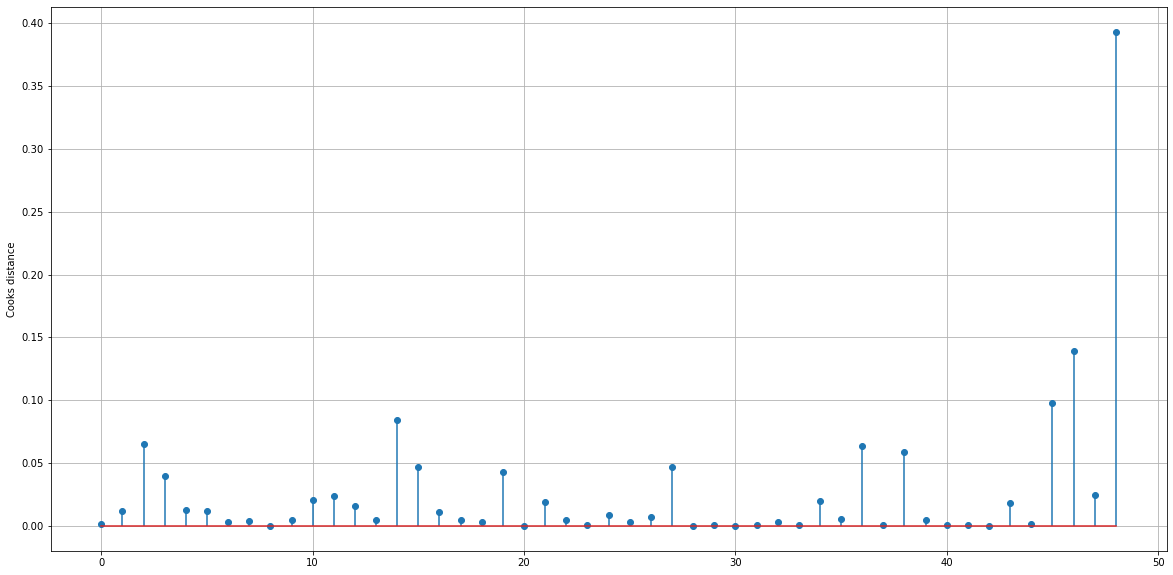

In [32]:
plt.figure(figsize=(20 , 10))
plt.stem(np.arange(len(startups_new)) , np.round(c , 3))
plt.ylabel("Cooks distance")
plt.grid()
plt.show()
# Since all cooks distance values are within .5 , no notable influencers.

In [33]:
# creating model by eleminating adminstraion.
startups_new_1 = startups_new_2.drop("Administration" , axis = 1)

In [34]:
model_new_1 = smf.ols("Profit~RandD_Spend+Marketing_Spend" , data = startups_new_1).fit()
model3 = model_new_1.rsquared
model3_p = "NA"
model3_pv = model_new_1.pvalues.Marketing_Spend
model_new_1.summary()
# Removing Administration has improved model , but it can't be removed as it is one of the key variable for prediction.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     504.0
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           1.43e-30
Time:                        12:17:38   Log-Likelihood:                -473.80
No. Observations:                  46   AIC:                             953.6
Df Residuals:                      43   BIC:                             959.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.186e+04   2581.289     20.090      0.000    4.67e+04    5.71e+04
RandD_Spend         0.7581      0.036     21.081      0.000       0.686       0.831
Marketing_Spend     0.0258      0.014      1.828      0.074      -0.003       0.054
==============================================================================
Omnibus:                        0.069   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.268
Skew:                           0.030   Prob(JB):                        0.875
Kurtosis:                       2.631   Cond. No.                     6.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model_new_2 = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend" , data = startups_new_2).fit()
model6 = model_new_2.rsquared
model6_p = model_new_2.pvalues.Administration
model6_pv= model_new_2.pvalues.Marketing_Spend
model_new_2.summary()
# Creating model by removing zero spend rows 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     343.4
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           1.47e-29
Time:                        12:17:38   Log-Likelihood:                -472.80
No. Observations:                  46   AIC:                             953.6
Df Residuals:                      42   BIC:                             960.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.921e+04   5963.323      9.930      0.000    4.72e+04    7.12e+04
RandD_Spend         0.7771      0.038     20.319      0.000       0.700       0.854
Administration     -0.0603      0.044     -1.365      0.179      -0.149       0.029
Marketing_Spend     0.0193      0.015      1.304      0.199      -0.011       0.049
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.518
Skew:                           0.071   Prob(JB):                        0.772
Kurtosis:                       2.500   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model6_p

0.17948697390859128

In [37]:
df = pd.DataFrame({'Models': ['Model 1' , 'Model 2' , "Model 3" , "Model 4" , 'Model 5' , 'Model 6'] , 'R squared values' : [model1,model2,model3,model4,model5,model6] , 'Comments' : ["Base model" , "Removing outliers" ,"Removing Adminstration variable" , " Trasform using sqrt" , "Trasform using log" , "Removing zero spend rows"] , "Administration P value":[model1_p,model2_p,model3_p,model4_p,model5_p,model6_p] , "Marketing Spend P value" : [model1_pv,model2_pv,model3_pv,model4_pv,model5_pv,model6_pv] })

In [38]:
df 
# Based on P values and R squared values we can take Model 6 for predicting profit of startups.

,Models,R squared values,Comments,Administration P value,Marketing Spend P value
0,Model 1,0.950746,Base model,0.601755,0.104717
1,Model 2,0.961316,Removing outliers,0.607073,0.074584
2,Model 3,0.959085,Removing Adminstration variable,NA,0.074436
3,Model 4,0.896054,Trasform using sqrt,0.673967,0.336526
4,Model 5,0.616754,Trasform using log,0.474399,0.351842
5,Model 6,0.960823,Removing zero spend rows,0.179487,0.199484


In [39]:
df_predict = pd.DataFrame({'RandD_Spend' :180000, 'Administration':150000, 'Marketing_Spend' : 475000},index=[1])

In [40]:
model_new_2.predict(df_predict)
# pridicting profit using model 6
#Insights - Spending more on Marketing yields higher profit


1    199200.323672
dtype: float64